# Домашнее задание 2 по обработке текстов

Рассмотрим задачу бинарной классификации. Пусть дано два списка имен: мужские и женские имена. Требуется разработать классификатор, который по данному имени будет определять мужское оно или женское.

Данные: 
* Женские имена: female.txt
* Мужские имена: male.txt

## Часть 1. Предварительная обработка данных

1. Удалите неоднозначные имена (те имена, которые являются и мужскими, и женскими дновременно), если такие есть; 
2. Создайте обучающее и тестовое множество так, чтобы в обучающем множестве классы были сбалансированы, т.е. к классу принадлежало бы одинаковое количество имен;

In [902]:
import pandas as pd
import numpy as np

#второе задание
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression

#третье задание
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import LSTM, Bidirectional
from keras.optimizers import RMSprop
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.utils import to_categorical
import string
sns.set()

In [408]:
with open('female.txt', 'r') as f:
    data_female = f.readlines()
with open('male.txt', 'r') as f:
    data_male = f.readlines()

In [409]:
female = list(set(data_female) - set(data_male))

In [410]:
male = list(set(data_male) - set(data_female))

In [411]:
len(female), len(male)

(4636, 2578)

In [755]:
for idx, name in enumerate(male):
    male[idx] = name.replace("\n", "")
for idx, name in enumerate(female):
    female[idx] = name.replace("\n", "")

In [413]:
male[:5], female[:5]

(['Barney', 'Goober', 'Olle', 'Teodor', 'Clarance'],
 ['Selestina', 'Norine', 'Alameda', 'Meggi', 'Hollie'])

In [414]:
df1 = pd.DataFrame(male, columns=['name'])

In [415]:
df1['sex'] = 1

In [416]:
df1.head()

,name,sex
0,Barney,1
1,Goober,1
2,Olle,1
3,Teodor,1
4,Clarance,1


In [417]:
df2 = pd.DataFrame(female, columns=['name'])

In [418]:
df2['sex'] = 0

In [419]:
df2.head()

,name,sex
0,Selestina,0
1,Norine,0
2,Alameda,0
3,Meggi,0
4,Hollie,0


In [420]:
len(df1), len(df2)

(2578, 4636)

In [421]:
df2 = df2.sample(len(df1))

In [422]:
len(df2)

2578

In [739]:
data = pd.concat([df1, df2])

In [740]:
data.reset_index(drop=True, inplace=True)

In [425]:
data.head(), data.tail()

(       name  sex
 0    Barney    1
 1    Goober    1
 2      Olle    1
 3    Teodor    1
 4  Clarance    1,           name  sex
 5151  Kerianne    0
 5152      Maia    0
 5153     Donia    0
 5154     Beret    0
 5155      Bree    0)

In [426]:
from sklearn.model_selection import train_test_split

In [427]:
X_train, X_test, y_train, y_test = train_test_split(data.name, data.sex, test_size=0.2, stratify=data.sex)

In [428]:
X_train.head()

295     Roosevelt
272       Jackson
2109        Aaron
2192       Pepito
3995        Tresa
Name: name, dtype: object

##  Часть 2. Базовый метод классификации

Используйте метод наивного Байеса или логистическую регрессию для классификации имен: в качестве признаков используйте символьные $n$-граммы. Сравните результаты, получаемые при разных $n=2,3,4$ по $F$-мере и аккуратности. В каких случаях метод ошибается?

Для генерации $n$-грамм используйте:

In [310]:
def classification_names(X_train, X_test, y_train, y_test, ngram=2, clf=BernoulliNB()):
    cv = CountVectorizer(analyzer='char', ngram_range=(ngram, ngram))
    cv.fit_transform(X_train)
    train = cv.transform(X_train)
    test = cv.transform(X_test)
    #clf = BernoulliNB()
    clf.fit(train, y_train)
    y_pred = clf.predict(test)
    print(classification_report(y_test, y_pred))

In [312]:
for ngram in range(2, 5):
    print(ngram)
    classification_names(X_train, X_test, y_train, y_test, ngram=ngram)
    print('-----------------------------------------------------------')

2
             precision    recall  f1-score   support

          0       0.72      0.75      0.73       516
          1       0.74      0.70      0.72       516

avg / total       0.73      0.73      0.73      1032

-----------------------------------------------------------
3
             precision    recall  f1-score   support

          0       0.74      0.83      0.78       516
          1       0.80      0.71      0.75       516

avg / total       0.77      0.77      0.77      1032

-----------------------------------------------------------
4
             precision    recall  f1-score   support

          0       0.83      0.77      0.80       516
          1       0.78      0.84      0.81       516

avg / total       0.81      0.80      0.80      1032

-----------------------------------------------------------


In [315]:
for ngram in range(2, 5):
    print(ngram)
    classification_names(X_train, X_test, y_train, y_test, ngram=ngram, clf=LogisticRegression())
    print('-----------------------------------------------------------')

2
             precision    recall  f1-score   support

          0       0.78      0.78      0.78       516
          1       0.78      0.78      0.78       516

avg / total       0.78      0.78      0.78      1032

-----------------------------------------------------------
3
             precision    recall  f1-score   support

          0       0.84      0.80      0.82       516
          1       0.81      0.85      0.83       516

avg / total       0.83      0.83      0.83      1032

-----------------------------------------------------------
4
             precision    recall  f1-score   support

          0       0.85      0.70      0.77       516
          1       0.75      0.88      0.81       516

avg / total       0.80      0.79      0.79      1032

-----------------------------------------------------------


In [429]:
for ngram in range(2, 5):
    print(ngram)
    classification_names(X_train, X_test, y_train, y_test, ngram=ngram, clf=RandomForestClassifier())
    print('-----------------------------------------------------------')

2
             precision    recall  f1-score   support

          0       0.79      0.84      0.81       516
          1       0.83      0.78      0.80       516

avg / total       0.81      0.81      0.81      1032

-----------------------------------------------------------
3
             precision    recall  f1-score   support

          0       0.78      0.78      0.78       516
          1       0.78      0.78      0.78       516

avg / total       0.78      0.78      0.78      1032

-----------------------------------------------------------
4
             precision    recall  f1-score   support

          0       0.85      0.66      0.74       516
          1       0.72      0.89      0.80       516

avg / total       0.79      0.77      0.77      1032

-----------------------------------------------------------


### Попробуем заглавные буквы сделать маленькими

In [334]:
X_train, X_test = X_train.apply(str.lower), X_test.apply(str.lower)

In [336]:
for ngram in range(2, 5):
    print(ngram)
    classification_names(X_train, X_test, y_train, y_test, ngram=ngram, clf=LogisticRegression())
    print('-----------------------------------------------------------')

2
             precision    recall  f1-score   support

          0       0.78      0.78      0.78       516
          1       0.78      0.78      0.78       516

avg / total       0.78      0.78      0.78      1032

-----------------------------------------------------------
3
             precision    recall  f1-score   support

          0       0.84      0.80      0.82       516
          1       0.81      0.85      0.83       516

avg / total       0.83      0.83      0.83      1032

-----------------------------------------------------------
4
             precision    recall  f1-score   support

          0       0.85      0.70      0.77       516
          1       0.75      0.88      0.81       516

avg / total       0.80      0.79      0.79      1032

-----------------------------------------------------------


##  Часть 3. Нейронная сеть


Используйте  реккурентную нейронную сеть с  LSTM для решения задачи. В ней может быть несколько слоев с LSTM, несколько слоев c Bidirectional(LSTM).  У нейронной сети один выход, определяющий класс имени. 

Представление имени для классификации в этом случае: бинарная матрица размера (количество букв в алфавите $\times$ максимальная длина имени). Обозначим его через $x$. Если первая буква имени a, то $x[1][1] = 1$, если вторая – b, то  $x[2][1] = 1$.  

Не забудьте про регуляризацию нейронной сети дропаутами. 

Сравните результаты классификации разными методами. Какой метод лучше и почему?

Сравните результаты, получаемые при разных значениях дропаута, разных числах узлов на слоях нейронной сети по $F$-мере и аккуратности. В каких случаях нейронная сеть ошибается?

Если совсем не получается запрограммировать нейронную сеть самостоятельно, обратитесь к туториалу тут: https://github.com/divamgupta/lstm-gender-predictor

#### Приведем имена к нижнему регистру

In [876]:
data.name = data.name.apply(str.lower)

#### Проверим количество имен, написанных через дефис/пробел. Если их немного, то можно их удалить.

In [877]:
data[data.name.str.find('-', start=0, end=None)>0][:5]

,name,sex
604,jean-marc,1
641,jean-lou,1
892,jean-luc,1
1127,jean-francois,1
1566,jean-pierre,1


In [878]:
len(data[data.name.str.find('-', start=0, end=None)>0])

29

In [879]:
data = data[data.name.str.find('-', start=0, end=None)<0]

#### Выкинем также имена, содержащие пробел

In [887]:
data.drop(data.name[data.name.str.find(' ', start=0, end=None)>0].index, inplace=True)

In [888]:
X_train, X_test, y_train, y_test = train_test_split(data.name, data.sex, test_size=0.2, stratify=data.sex)

In [880]:
max_len = data.name.map(len).max()
max_len

12

In [881]:
s = string.ascii_lowercase

In [882]:
len_alph = len(list(s))

In [883]:
list_alph = list(s)

#### Переведем слова в бинарную матрицу

In [884]:
def words_to_matrix(words, len_alph=len_alph, max_len=max_len):
    array = np.zeros((len(words), len_alph, max_len))
    for row, word in enumerate(words):
        for col, char in enumerate(word):
            idx = list_alph.index(word[col])
            array[row][idx][col] = 1
    return array

In [889]:
X_train_arr = words_to_matrix(X_train, len_alph=len_alph, max_len=max_len)

In [890]:
X_test_arr = words_to_matrix(X_test, len_alph=len_alph, max_len=max_len)

In [891]:
y_binary = to_categorical(y_train)

In [892]:
X_train_arr.shape

(4100, 26, 12)

In [894]:
y_binary.shape

(4100, 2)

In [956]:
def get_model(units_layer=[128, 64, 64, 32], drop_rate=0.2):
    
    model = Sequential()
    
    model.add(LSTM(units_layer[0], return_sequences=True, input_shape=(26, 12)))
    model.add(Dropout(drop_rate))
    model.add(LSTM(units_layer[1], return_sequences=True))
    model.add(Dropout(drop_rate))    
    model.add(Bidirectional(LSTM(units_layer[2], return_sequences=True)))
    model.add(Dropout(drop_rate))
    model.add(Bidirectional(LSTM(units_layer[3])))
    model.add(Dropout(drop_rate))
    model.add(Dense(2, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    return model

In [974]:
def train(model, epochs=50, verbose=1):
    loss = []
    acc_train = []
    acc_test = []
    f1_test = []
    for k in range(epochs):
        score = model.fit(X_train_arr, y_binary, batch_size=32, epochs=1, verbose=verbose)
        loss.append(score.history['loss'][0])
        acc_train.append(score.history['acc'][0])
        y_pred = model.predict_classes(X_test_arr)
        acc_test.append(accuracy_score(y_test, y_pred))
        f1_test.append(f1_score(y_test, y_pred))
        if k % 10 == 0:
            print('loss: {0:.2}, acc_train: {1:.2%}, acc_test: {2:.2%}, f1_test: {3:.2%}'.format(\
                    loss[k], acc_train[k], acc_test[k], f1_test[k]))
    return loss, acc_train, acc_test, f1_test

In [975]:
def plot_results(result):
    plt.figure(figsize=(12, 8))
    plt.plot(result[0], label='loss')
    plt.plot(result[1], label='acc_train')
    plt.plot(result[2], label='acc_test')
    plt.plot(result[3], label='f1_test')
    plt.legend()
    plt.show()

#### Протестируем первую сеть. 
4 слоя: 2 слоя LSTM и 2 слоя Bidirectional(LSTM) [128, 64, 64, 32]. Dropout = 0.2.

In [978]:
model_1 = get_model()

In [979]:
result_1 = train(model_1, 50, verbose=0)

loss: 0.65, acc_train: 61.46%, acc_test: 61.07%, f1_test: 69.28%
loss: 0.5, acc_train: 74.37%, acc_test: 75.51%, f1_test: 76.99%
loss: 0.45, acc_train: 78.07%, acc_test: 76.20%, f1_test: 77.53%
loss: 0.4, acc_train: 81.24%, acc_test: 78.05%, f1_test: 78.30%
loss: 0.37, acc_train: 83.00%, acc_test: 78.44%, f1_test: 76.56%


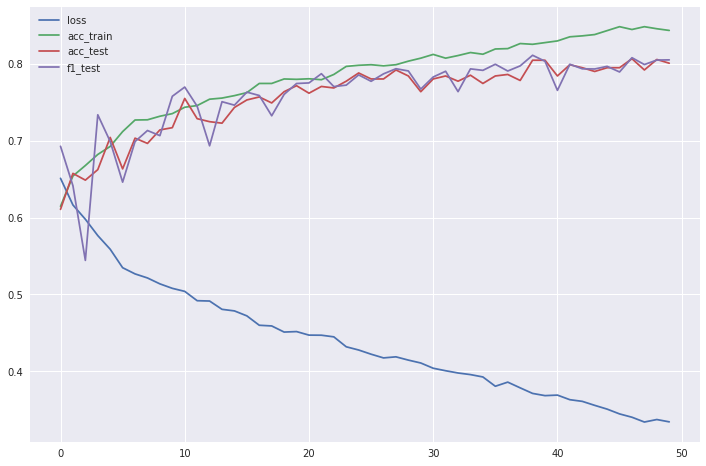

In [980]:
plot_results(result_1)

In [981]:
print(classification_report(y_test, model_1.predict_classes(X_test_arr)))

             precision    recall  f1-score   support

          0       0.81      0.78      0.80       511
          1       0.79      0.82      0.81       514

avg / total       0.80      0.80      0.80      1025



#### Оставим все тоже самое, но поменяем значение Dropout = 0.5.
4 слоя: 2 слоя LSTM и 2 слоя Bidirectional(LSTM) [128, 64, 64, 32]. Dropout = 0.5. 

In [982]:
model_2 = get_model(drop_rate=0.5)

In [983]:
result_2 = train(model_2, 50, verbose=0)

loss: 0.66, acc_train: 60.66%, acc_test: 66.83%, f1_test: 63.20%
loss: 0.53, acc_train: 71.73%, acc_test: 73.56%, f1_test: 72.76%
loss: 0.49, acc_train: 74.59%, acc_test: 75.61%, f1_test: 76.01%
loss: 0.44, acc_train: 78.88%, acc_test: 73.85%, f1_test: 77.92%
loss: 0.42, acc_train: 80.12%, acc_test: 77.95%, f1_test: 79.07%


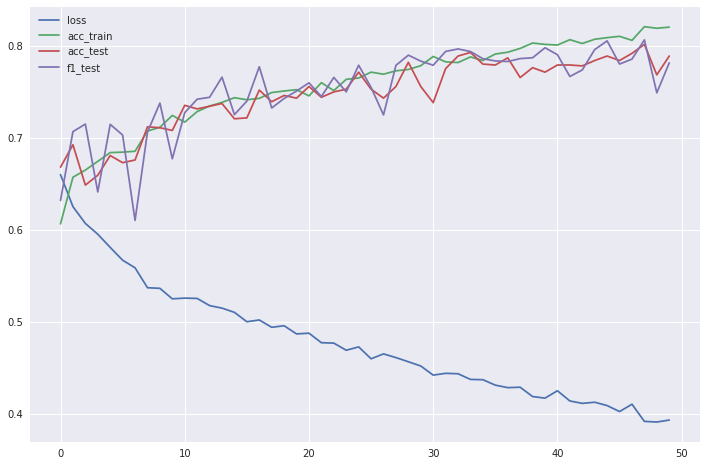

In [984]:
plot_results(result_2)

In [985]:
print(classification_report(y_test, model_2.predict_classes(X_test_arr)))

             precision    recall  f1-score   support

          0       0.77      0.83      0.80       511
          1       0.81      0.75      0.78       514

avg / total       0.79      0.79      0.79      1025



#### Оставим все тоже самое, но поменяем значение Dropout = 0.8.
4 слоя: 2 слоя LSTM и 2 слоя Bidirectional(LSTM) [128, 64, 64, 32]. Dropout = 0.8. 

In [986]:
model_3 = get_model(drop_rate=0.8)

In [987]:
result_3 = train(model_3, 50, verbose=0)

loss: 0.68, acc_train: 54.73%, acc_test: 62.83%, f1_test: 56.85%
loss: 0.57, acc_train: 68.78%, acc_test: 58.24%, f1_test: 68.90%
loss: 0.54, acc_train: 72.22%, acc_test: 72.98%, f1_test: 74.98%
loss: 0.53, acc_train: 72.83%, acc_test: 74.34%, f1_test: 74.64%
loss: 0.51, acc_train: 74.17%, acc_test: 76.39%, f1_test: 78.70%


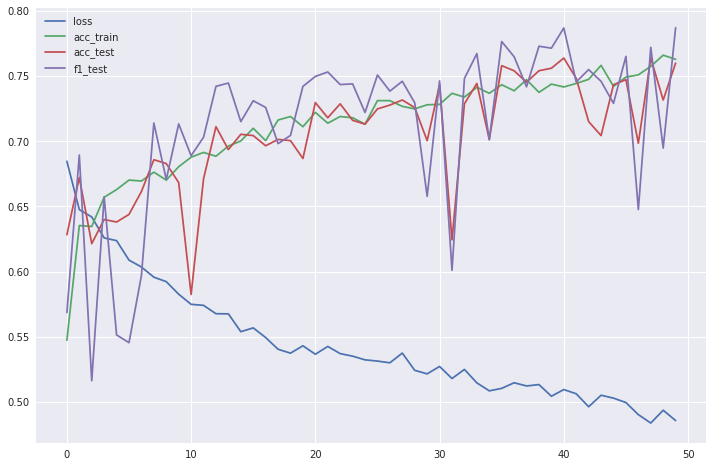

In [988]:
plot_results(result_3)

In [989]:
print(classification_report(y_test, model_3.predict_classes(X_test_arr)))

             precision    recall  f1-score   support

          0       0.85      0.63      0.72       511
          1       0.71      0.89      0.79       514

avg / total       0.78      0.76      0.76      1025



#### Попробуем другую сеть. 5 слоев: 
LSTM, Bidirectional(LSTM), LSTM, Bidirectional(LSTM), LSTM. [128, 128, 64, 64, 64]. Dropout = 0.2.

In [990]:
def get_model_5_layers(units_layer=[128, 128, 64, 64, 64], drop_rate=0.2):
    
    model = Sequential()
    
    model.add(LSTM(units_layer[0], return_sequences=True, input_shape=(26, 12)))
    model.add(Dropout(drop_rate))
    model.add(Bidirectional(LSTM(units_layer[1], return_sequences=True)))
    model.add(Dropout(drop_rate))
    model.add(LSTM(units_layer[2], return_sequences=True))
    model.add(Dropout(drop_rate))    
    model.add(Bidirectional(LSTM(units_layer[3], return_sequences=True)))
    model.add(Dropout(drop_rate))
    model.add(LSTM(units_layer[4]))
    model.add(Dense(2, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    return model

In [991]:
model_4 = get_model_5_layers()

In [992]:
result_4 = train(model_4, 50, verbose=0)

loss: 0.67, acc_train: 57.39%, acc_test: 65.07%, f1_test: 57.88%
loss: 0.53, acc_train: 70.85%, acc_test: 69.17%, f1_test: 71.53%
loss: 0.48, acc_train: 75.29%, acc_test: 74.24%, f1_test: 75.19%
loss: 0.44, acc_train: 77.98%, acc_test: 75.61%, f1_test: 75.10%
loss: 0.39, acc_train: 81.39%, acc_test: 77.95%, f1_test: 78.14%


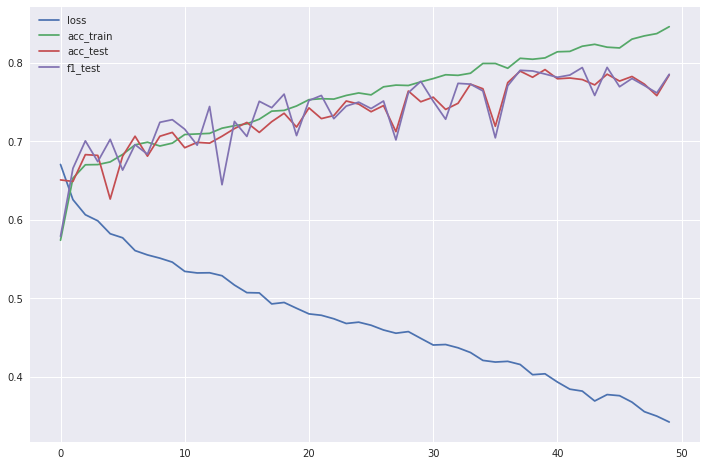

In [993]:
plot_results(result_4)

In [994]:
print(classification_report(y_test, model_4.predict_classes(X_test_arr)))

             precision    recall  f1-score   support

          0       0.78      0.78      0.78       511
          1       0.78      0.79      0.79       514

avg / total       0.78      0.78      0.78      1025



#### Такая же сеть, но поменяем dropout на 0.4 и увеличим количество эпох.
LSTM, Bidirectional(LSTM), LSTM, Bidirectional(LSTM), LSTM. [128, 128, 64, 64, 64]. Dropout = 0.4.

In [996]:
result_5 = train(model_5, 80, verbose=0)

loss: 0.67, acc_train: 57.73%, acc_test: 63.12%, f1_test: 56.35%
loss: 0.54, acc_train: 71.34%, acc_test: 66.05%, f1_test: 73.56%
loss: 0.48, acc_train: 75.10%, acc_test: 70.44%, f1_test: 74.77%
loss: 0.44, acc_train: 78.02%, acc_test: 75.80%, f1_test: 76.99%
loss: 0.41, acc_train: 80.83%, acc_test: 77.37%, f1_test: 79.06%
loss: 0.37, acc_train: 82.68%, acc_test: 77.27%, f1_test: 78.99%
loss: 0.32, acc_train: 85.59%, acc_test: 79.32%, f1_test: 80.04%
loss: 0.28, acc_train: 87.32%, acc_test: 77.95%, f1_test: 79.45%


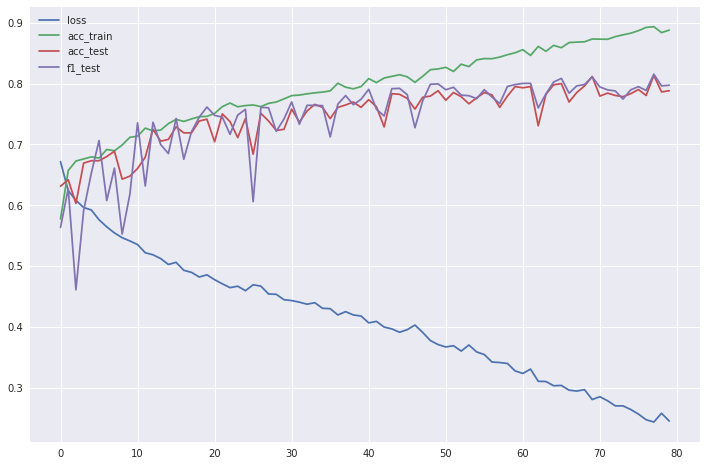

In [997]:
plot_results(result_5)

In [998]:
print(classification_report(y_test, model_5.predict_classes(X_test_arr)))

             precision    recall  f1-score   support

          0       0.81      0.75      0.78       511
          1       0.77      0.83      0.80       514

avg / total       0.79      0.79      0.79      1025

